<left>
<img src="../../data/idc_logo.png" width=100 align="left">
</left>

<H4>Advanced Stats. for Data Science (Spring 2022)</H4>

<H1>Examples from Lecture 1 </H1>

In [2]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import statsmodels.api as sm
np.random.seed(2021)

plt.rcParams["figure.figsize"] = (10,7)
plt.rcParams.update({'font.size': 18})

### Example 1: Height-Weight

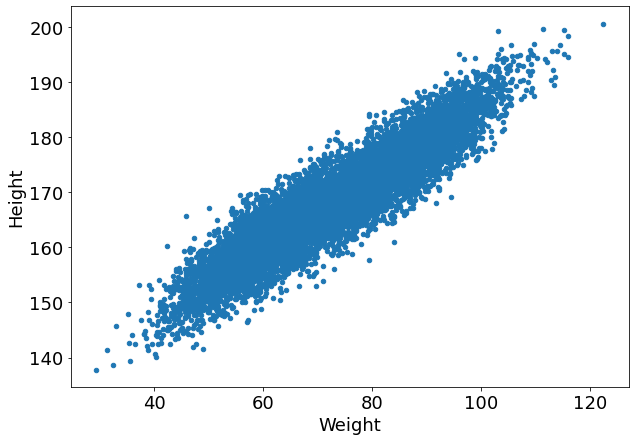

,Height,Weight
count,10000.000000,10000.000000
mean,168.573602,73.228054
std,9.772721,14.564131
min,137.828359,29.347460
25%,161.304276,61.605982
50%,168.447898,73.124894
75%,175.702625,84.898599
max,200.656806,122.465167


In [3]:
data = pd.read_csv("weight-height.csv")
KGS_IN_POUND = 0.453592
CENT_IN_INCH = 2.54
data['Height'] = data['Height'] * CENT_IN_INCH
data['Weight'] = data['Weight'] * KGS_IN_POUND

data.plot.scatter(y='Height', x='Weight'); 
plt.show()
data.describe()

In [4]:
# we can find the solution as follows
y = data['Weight']
x = data['Height']

Z = np.column_stack((np.ones_like(y) , x))
beta_hat = np.dot(np.linalg.inv(np.dot(Z.T, Z)), np.dot(Z.T, y))

print(f"beta0_hat = {beta_hat[0]}")
print(f"beta1_hat = {beta_hat[1]}")

beta0_hat = -159.09158430834577
beta1_hat = 1.3781495809281523


#### Say that the new height measurement is $x_{n+1}$, what is the predcition $\hat{y}_{n+1}$ of the **_unknown_** weight measurement $y_{n+1}$?

y_new_hat = 82.08459235408088


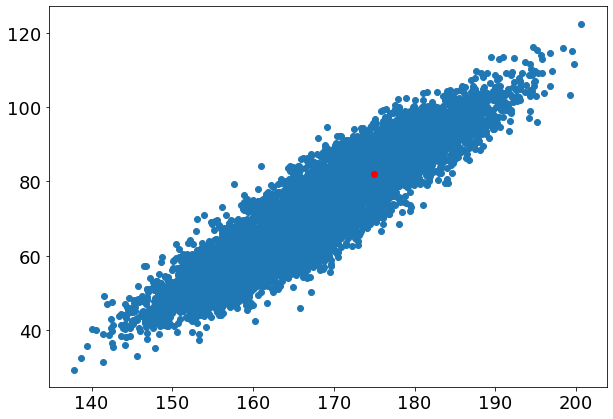

In [5]:
x_new = 175
y_hat_new = beta_hat[0] + beta_hat[1] * x_new
y_hat = beta_hat[0] + beta_hat[1] * x
print(f"y_new_hat = {y_hat_new}")

plt.scatter(x=data['Height'], y=data['Weight'])
plt.scatter([x_new], [y_hat_new], c='red')
#plt.xlabel('Height')
#plt.ylabel('Weight')
plt.show()

More generally, under our model, the set of (predictor, prediction) is a line:

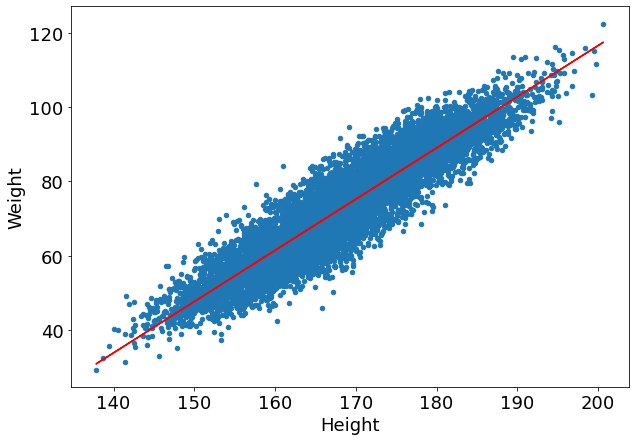

In [6]:
#more generally:
data['y_hat'] = beta_hat[0] + beta_hat[1] * data['Height']
p = data.plot.scatter(y='Weight', x='Height')
p.plot(data['Height'], data['y_hat'], c='r')
plt.show()

#### How can we tell is this is a good model? 

One option is **explained** variance:
$$
R^2 := 1 - \frac{\sum_{i=1}^n(y_i-\hat{y}_i)^2}{\sum_{i=1}^n (y_i - \bar{y})^2}
$$
We will have more to say about this quantity

In [7]:
y_hat = np.matmul(Z, beta_hat)
print(r"R^2 = ", 1 - np.sum((y_hat - y)**2) / np.sum((y - np.mean(y))**2))

R^2 =  0.8551742120609958


If this number is close to 1, then the predictor explains the response well.

#### What if we know the person's gender?

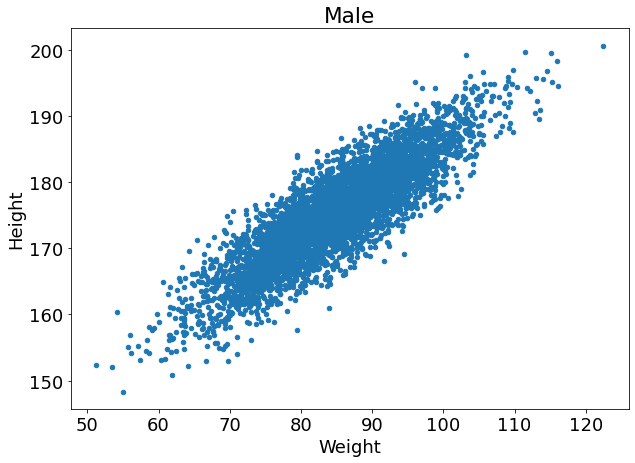

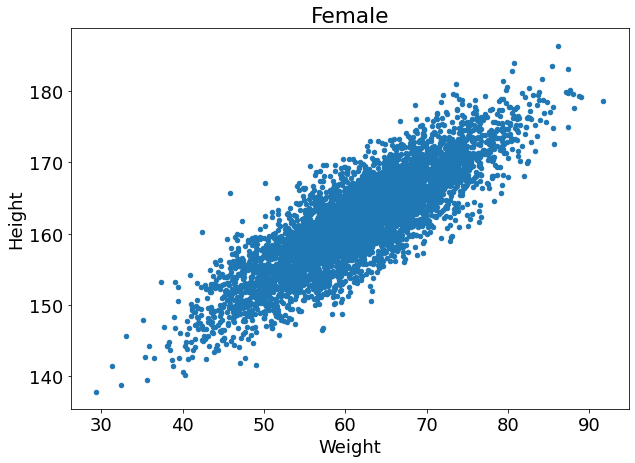

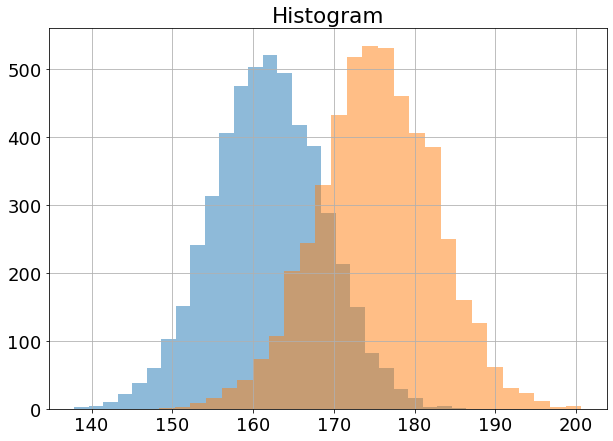

In [8]:
data[data.Gender == 'Male'].plot.scatter(x='Weight', y='Height')
plt.title("Male")
plt.show()
data[data.Gender == 'Female'].plot.scatter(x='Weight', y='Height')
plt.title("Female")
plt.show()

data.groupby('Gender').Height.hist(bins=27, alpha=0.5)
plt.title('Histogram')
plt.show()

We can try and incorporate the gender variable by adding a dummy varaible:
$$
x_1 = \begin{cases}
1 & \mathrm{female} \\
0 & \mathrm{male}
\end{cases}
$$
The new model is
$$
\begin{align}
\mathbb E\left[Y | X=x \right] & = \beta_0 + \beta_1 x +  x_1 (\beta_2 + \beta_3 x) \\
 & = \beta_0 + \beta_1 x +  \beta_2 x_1 + \beta_3 x \cdot x_1  
\end{align}
$$
This is a linear model with predictors $X = (1, x, x_1, x \cdot x_1)$. $\beta_2$ and $\beta_3$ corresponds to the "extra effect" of the female group

In [9]:
x1 = data['Gender'] == 'Female'
Z = np.column_stack((np.ones_like(y), x, x1, x1 * x))  # possible different intercept and slope for female

beta_hat = np.linalg.lstsq(Z, y, rcond=None)[0]
print(f"beta_hat for all male model is {beta_hat}")
print(f"beta0_hat = {beta_hat[0]}")
print(f"beta1_hat = {beta_hat[1]}")
print(f"beta2_hat = {beta_hat[2]}")
print(f"beta3_hat = {beta_hat[3]}")

beta_hat for all male model is [-1.01830878e+02  1.06465075e+00 -9.75877108e+00  5.76326188e-03]
beta0_hat = -101.83087815327029
beta1_hat = 1.0646507507658531
beta2_hat = -9.758771083294299
beta3_hat = 0.005763261881813718


In the new model better? in what sense?

Later on in class, we will answer such question using analysis of varaince (ANOVA) methods. 

## Example 2: Housing Prices 

In [10]:
# 
data = pd.read_csv("housing_prices.csv")
data = data[data.LotArea < 15000]  # we focus on small lots

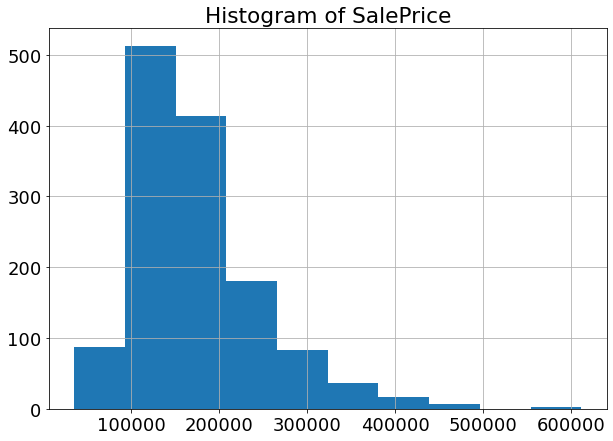

In [11]:
data['SalePrice'].hist()
plt.title("Histogram of SalePrice")
plt.show()

We have 80 possible predictors:

In [12]:
print(data.columns)

Index(['Id', 'MSSubClass', 'MSZoning', 'LotFrontage', 'LotArea', 'Street',
       'Alley', 'LotShape', 'LandContour', 'Utilities', 'LotConfig',
       'LandSlope', 'Neighborhood', 'Condition1', 'Condition2', 'BldgType',
       'HouseStyle', 'OverallQual', 'OverallCond', 'YearBuilt', 'YearRemodAdd',
       'RoofStyle', 'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType',
       'MasVnrArea', 'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual',
       'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinSF1',
       'BsmtFinType2', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', 'Heating',
       'HeatingQC', 'CentralAir', 'Electrical', '1stFlrSF', '2ndFlrSF',
       'LowQualFinSF', 'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath',
       'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'KitchenQual',
       'TotRmsAbvGrd', 'Functional', 'Fireplaces', 'FireplaceQu', 'GarageType',
       'GarageYrBlt', 'GarageFinish', 'GarageCars', 'GarageArea', 'GarageQual',
       'GarageCond', 'PavedDrive

We focus on two pedictors:
- ``LotArea``
- ``YearBuilt``

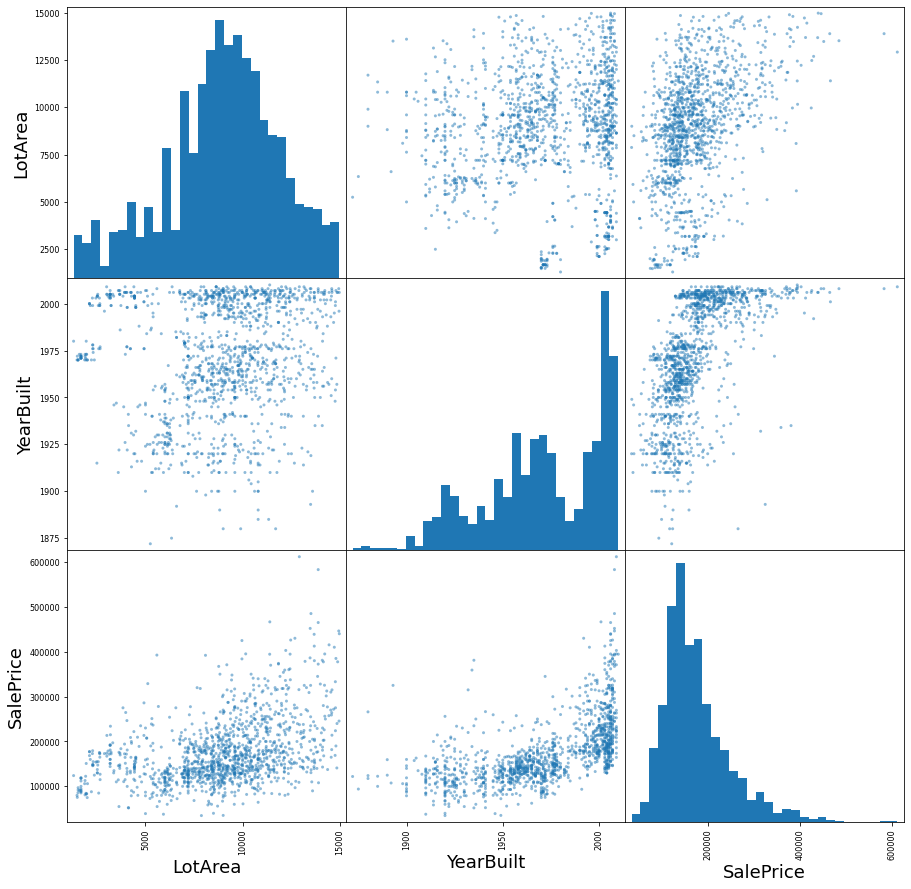

In [13]:
plt.rcParams['figure.figsize'] =  [15, 15]

data_red = data.filter(
    [#'GarageCars',
    'LotArea', 
    'YearBuilt',
    'SalePrice'])

data['h-MSZoning'] = data.MSZoning.apply(hash) # convert this categorical data to numeric

pd.plotting.scatter_matrix(data_red,
            hist_kwds={'bins':30})

plt.show()
plt.rcParams["figure.figsize"] = (10,5)

In [14]:
import statsmodels.formula.api as smf

model = smf.ols(formula='SalePrice ~ LotArea + YearBuilt', data=data).fit()
model.summary2()

<class 'statsmodels.iolib.summary2.Summary'>
"""
                       Results: Ordinary least squares
==============================================================================
Model:                   OLS                 Adj. R-squared:        0.475     
Dependent Variable:      SalePrice           AIC:                   32868.8028
Date:                    2022-03-17 12:16    BIC:                   32884.3996
No. Observations:        1338                Log-Likelihood:        -16431.   
Df Model:                2                   F-statistic:           606.5     
Df Residuals:            1335                Prob (F-statistic):    4.18e-188 
R-squared:               0.476               Scale:                 2.7244e+09
------------------------------------------------------------------------------
              Coef.      Std.Err.     t     P>|t|      [0.025        0.975]   
------------------------------------------------------------------------------
Intercept -2468082.3839 92748.4785 -26.6105 0.0000 -2650031.0207 -2286133.7470
LotArea          9.0723     0.4902  18.5092 0.0000        8.1108       10.0339
YearBuilt     1299.5589    47.2116  27.5263 0.0000     1206.9420     1392.1758
------------------------------------------------------------------------------
Omnibus:                  406.920          Durbin-Watson:             2.000   
Prob(Omnibus):            0.000            Jarque-Bera (JB):          1473.090
Skew:                     1.453            Prob(JB):                  0.000   
Kurtosis:                 7.241            Condition No.:             625378  
==============================================================================
* The condition number is large (6e+05). This might indicate
strong multicollinearity or other numerical problems.
"""

Possible ways to improve our model:
1. Add a additional relevant regressors, e.g. population density
2. Apply transformation to the predictors, for example to stabilize the variance. 

For example, it is possible that at $t_0 = 1980$ the coefficient representaing the relationship between YearBuilt and SalePrice got larger. We can add the regressor $\texttt{YearBuiltChange} = (\texttt{YearBuilt} - t_0)_+$

In [15]:
import statsmodels.formula.api as smf
t0 = 1980
data['YearBuiltKink'] = np.maximum(data['YearBuilt'] - t0, 0)
model = smf.ols(formula='SalePrice ~ LotArea + YearBuilt + YearBuiltKink', data=data).fit()
model.summary2()

<class 'statsmodels.iolib.summary2.Summary'>
"""
                        Results: Ordinary least squares
===============================================================================
Model:                  OLS                  Adj. R-squared:         0.565     
Dependent Variable:     SalePrice            AIC:                    32617.4955
Date:                   2022-03-17 12:16     BIC:                    32638.2912
No. Observations:       1338                 Log-Likelihood:         -16305.   
Df Model:               3                    F-statistic:            580.9     
Df Residuals:           1334                 Prob (F-statistic):     1.83e-241 
R-squared:              0.566                Scale:                  2.2562e+09
-------------------------------------------------------------------------------
                 Coef.       Std.Err.     t    P>|t|     [0.025       0.975]   
-------------------------------------------------------------------------------
Intercept     -580451.4936 141206.2981 -4.1107 0.0000 -857462.0856 -303440.9015
LotArea             9.1957      0.4461 20.6131 0.0000       8.3206      10.0709
YearBuilt         326.9851     72.4425  4.5137 0.0000     184.8714     469.0987
YearBuiltKink    3318.6869    199.0277 16.6745 0.0000    2928.2456    3709.1283
-------------------------------------------------------------------------------
Omnibus:                 365.132           Durbin-Watson:              1.950   
Prob(Omnibus):           0.000             Jarque-Bera (JB):           1389.854
Skew:                    1.277             Prob(JB):                   0.000   
Kurtosis:                7.291             Condition No.:              1046255 
===============================================================================
* The condition number is large (1e+06). This might indicate             strong
multicollinearity or other numerical problems.
"""

We will see later on that the second model is considered better

## Example 3: Financial Time Series

In [16]:
import yfinance as yf 
data = yf.download(tickers=['UBER', 'AAPL', 'AMZN', 'GOOGL', 'F', 'TSLA', 'IBM'], period='24mo', interval='1d')

[*********************100%***********************]  7 of 7 completed


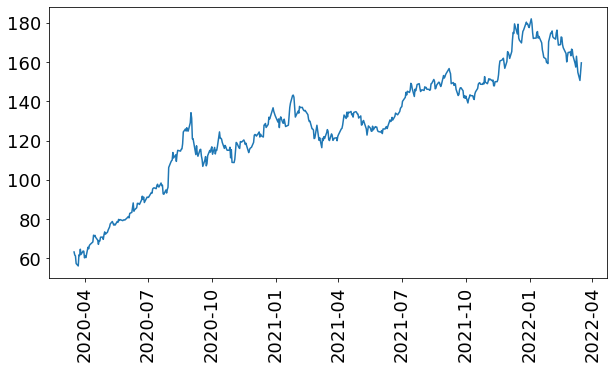

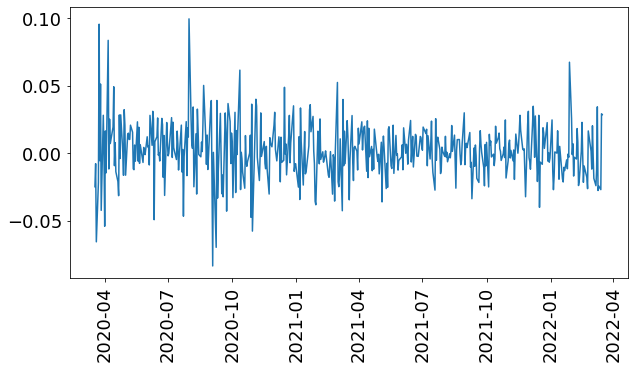

In [17]:
plt.rcParams["figure.figsize"] = (10,5)
plt.plot(data[('Close', 'AAPL')])
plt.xticks(rotation='vertical')
plt.show("AAPL Daily Return over Time")

plt.plot(data[('Close', 'AAPL')].apply(np.log).diff())
plt.xticks(rotation='vertical')
plt.show("AAPL Daily Relative Return over Time")

### Smoothing using Polynomial regression

If we beleive that the signal is smooth but contaminated by noise, we may try and fit a polynomial:
$$
y_i = \beta_0 + \beta_1 t_i + \beta_2 t_i^2 + \ldots + \beta_{p-1} t_i^{p-1}
$$

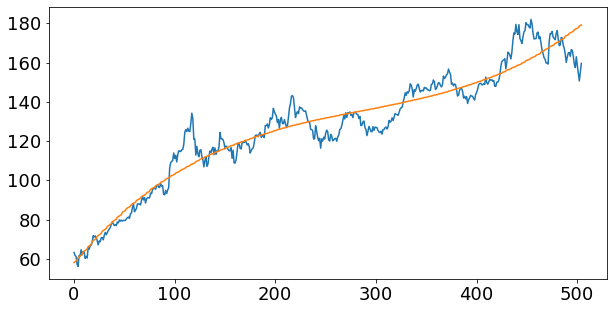

In [18]:
import statsmodels.api as sm
y = data[('Close', 'AAPL')]
t0 = data.index[0]
t = (data.index - t0).days
Z = np.vstack((np.ones_like(t), t, t**2, t**3)).T # cubic ploynomial

model = sm.OLS(y,Z)
results = model.fit()
y_hat = model.predict(results.params, Z)

plt.plot(y.values)
plt.plot(y_hat)
plt.show()

###  Linear relationship between assets

Note: this is **not** regression over time, but regression of one series against others

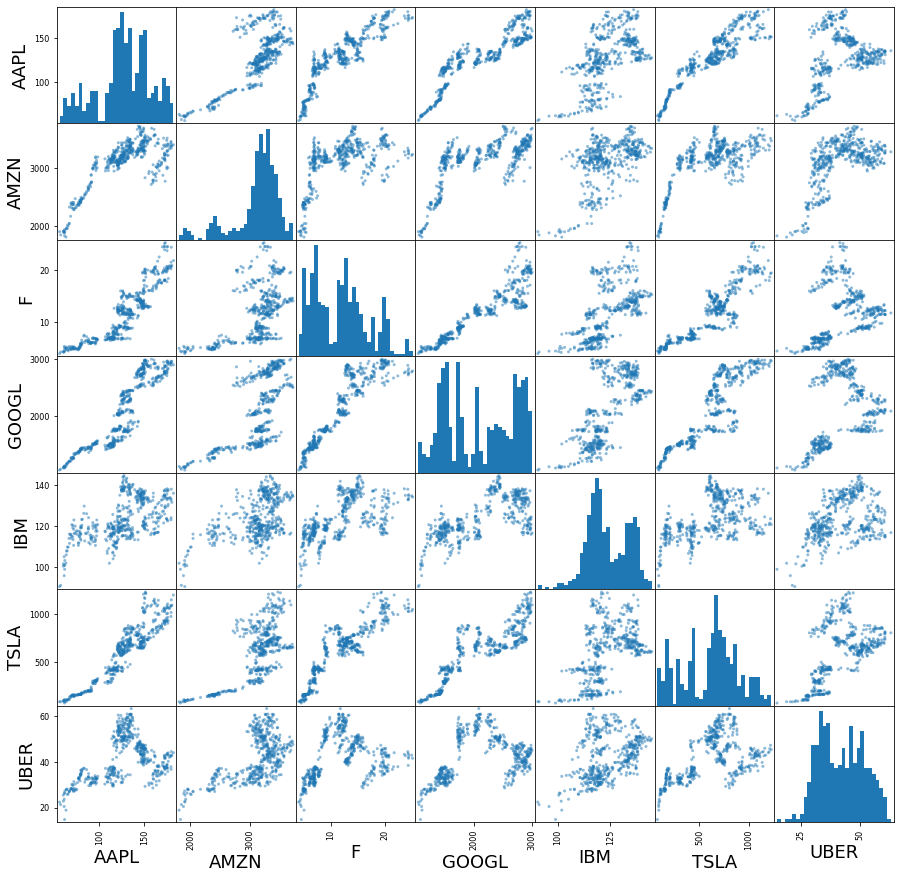

In [19]:
plt.rcParams['figure.figsize'] =  [15, 15]
data_red = data.Close

pd.plotting.scatter_matrix(data_red,
            hist_kwds={'bins':30})

plt.show()
plt.rcParams['figure.figsize'] =  [10, 5]

### Predicting the price of one asset based on other assets:

In [20]:
import statsmodels.formula.api as smf

model = smf.ols(formula='AAPL ~ UBER + TSLA + F + IBM + AMZN', data=data_red).fit()
model.summary2()

<class 'statsmodels.iolib.summary2.Summary'>
"""
                 Results: Ordinary least squares
==================================================================
Model:              OLS              Adj. R-squared:     0.933    
Dependent Variable: AAPL             AIC:                3482.7732
Date:               2022-03-17 12:16 BIC:                3508.1206
No. Observations:   505              Log-Likelihood:     -1735.4  
Df Model:           5                F-statistic:        1401.    
Df Residuals:       499              Prob (F-statistic): 5.18e-291
R-squared:          0.934            Scale:              57.219   
-------------------------------------------------------------------
              Coef.   Std.Err.     t      P>|t|    [0.025    0.975]
-------------------------------------------------------------------
Intercept    -6.9565    5.0644   -1.3736  0.1702  -16.9066   2.9937
UBER         -0.6112    0.0499  -12.2464  0.0000   -0.7093  -0.5132
TSLA          0.0654    0.0041   16.0843  0.0000    0.0574   0.0734
F             0.9164    0.2147    4.2690  0.0000    0.4947   1.3382
IBM           0.3270    0.0518    6.3161  0.0000    0.2253   0.4287
AMZN          0.0220    0.0014   15.5624  0.0000    0.0192   0.0248
------------------------------------------------------------------
Omnibus:               32.333       Durbin-Watson:          0.087 
Prob(Omnibus):         0.000        Jarque-Bera (JB):       52.924
Skew:                  -0.451       Prob(JB):               0.000 
Kurtosis:              4.304        Condition No.:          48339 
==================================================================
* The condition number is large (5e+04). This might indicate
strong multicollinearity or other numerical problems.
"""

Additional options:
Regression against lagged predictors $x_i = x_{i-i_0}$ makes sense in a time-series context.

Later on in the class, we will see how to select a minimal set of predicotrs explaining the response. This is important to reduce overfitting

## Curve Fitting
When we know that the phenomena we are looging for is represented by a smooth signal, we can use linear regression to remove noise (filtering) and predict unseen values (prediction). 

The following dataset is taken from Google Trends:
https://trends.google.com/trends/explore?date=now%207-d&geo=US&q=%2Fm%2F03d9rk

In [21]:
gtrends = pd.read_csv("AnneFrank.csv", header=1)
#data = data.reset_index()
gtrends = gtrends.rename(columns = {'Anne Frank: (United States)' : 'Anne Frank'})

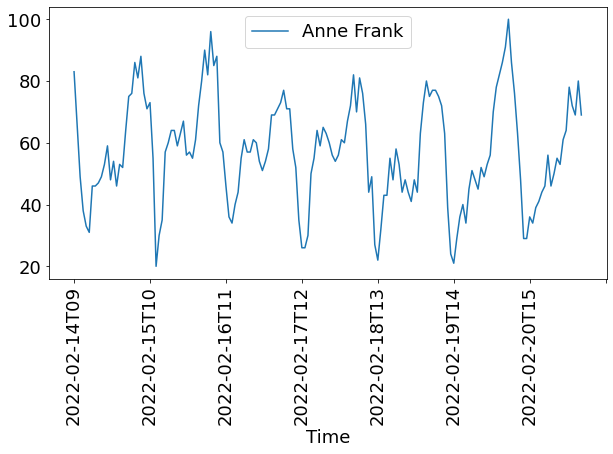

In [22]:
gtrends.plot.line(x='Time', y='Anne Frank'); 
plt.xticks(rotation='vertical')
plt.show()

Seems like a linear function riding on a sinusoid of 24 hours period. Proposed model:
$$
y_i = \beta_0 + \beta_1 t_i + \beta_2 \sin(2 \pi \cdot t_i /24) + \beta_3 \cos(2 \pi \cdot t_i /24)
$$
$t_i = 1,2,3$ hours

In [23]:
# predictors (features)
tt = np.arange(0,len(gtrends))
x0 = np.ones(len(gtrends))
x1 = tt
x2 = np.sin(2 * np.pi * tt / 24)
x3 = np.cos(2 * np.pi * tt / 24)
Z = np.column_stack((x0 , x1, x2, x3))

# response
y = gtrends['Anne Frank']

In [24]:
import statsmodels.api as sm
model = sm.OLS(y,Z)
results = model.fit()
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:             Anne Frank   R-squared:                       0.486
Model:                            OLS   Adj. R-squared:                  0.476
Method:                 Least Squares   F-statistic:                     51.62
Date:                Thu, 17 Mar 2022   Prob (F-statistic):           1.51e-23
Time:                        12:16:49   Log-Likelihood:                -657.71
No. Observations:                 168   AIC:                             1323.
Df Residuals:                     164   BIC:                             1336.
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         60.5534      1.895     31.946      0.000      56.811      64.296
x1            -0.0394      0.020     -2.005      0.047      -0.078      -0.001
x2           -15.2793      1.348    -11.332      0.000     -17.942     -12.617
x3             6.7773      1.340      5.057      0.000       4.131       9.423
==============================================================================
Omnibus:                        0.712   Durbin-Watson:                   0.507
Prob(Omnibus):                  0.700   Jarque-Bera (JB):                0.806
Skew:                          -0.053   Prob(JB):                        0.668
Kurtosis:                       2.678   Cond. No.                         194.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

Remark:
- The value of the Durbin-Watson test indicates auto-correlation among the residuals, suggesting an auto-regression model for this data. We will not handle auto-regressive models in this class.

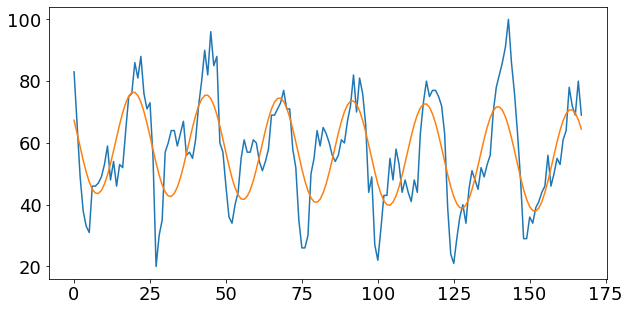

In [25]:
# illustrating fited curve:
y_pred = model.predict(results.params, Z) # equivalent to y_pred = np.dot(beta_hat.T, Z)
plt.plot(tt, y)
plt.plot(tt, y_pred)
plt.show()

Can we try and **predict** future values? 

In [26]:
T0 = 24 # 24 hours into the future

ttn = np.arange(0, len(gtrends)+T0)
x0 = np.ones(len(ttn))
x1 = ttn
x2 = np.sin(2 * np.pi * ttn / 24)
x3 = np.cos(2 * np.pi * ttn / 24)
Znew = np.column_stack((x0 , x1, x2, x3))

y_new = model.predict(results.params, Znew)

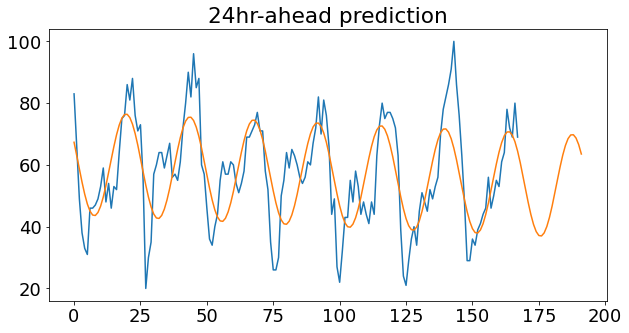

In [27]:
plt.plot(tt, y)
plt.plot(ttn, y_new)
plt.title("24hr-ahead prediction")
plt.show()

Later on in class, we would be able to provide coinfidnece intervals of our prediction